<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/NLP_Sklearn_Distance_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://liferay.de.dariah.eu/tatom/_downloads/datasets.zip

--2019-06-23 09:18:27--  https://liferay.de.dariah.eu/tatom/_downloads/datasets.zip
Resolving liferay.de.dariah.eu (liferay.de.dariah.eu)... 134.76.30.131
Connecting to liferay.de.dariah.eu (liferay.de.dariah.eu)|134.76.30.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57659024 (55M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]  54.99M  97.2MB/s    in 0.6s    

2019-06-23 09:18:27 (97.2 MB/s) - ‘datasets.zip’ saved [57659024/57659024]



In [0]:
!unzip /content/datasets.zip

In [0]:
filenames = [
    '/content/data/austen-brontë/Austen_Emma.txt',
    '/content/data/austen-brontë/Austen_Pride.txt',
    '/content/data/austen-brontë/Austen_Sense.txt',
    '/content/data/austen-brontë/CBronte_Jane.txt',
    '/content/data/austen-brontë/CBronte_Professor.txt',
    '/content/data/austen-brontë/CBronte_Villette.txt'
]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [0]:
vectorizer = CountVectorizer(input='filename')

In [0]:
dtm = vectorizer.fit_transform(filenames)

In [8]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [0]:
vocab = vectorizer.get_feature_names()

In [0]:
vocab = np.array(vocab)

In [15]:
vocab[300:340]

array(['_sacrifice_', '_said_', '_salle', '_salut_', '_sang', '_savoir',
       '_saw_', '_say_', '_scarlet', '_secret_', '_seem_', '_seemed_',
       '_sensation_', '_sensitive_', '_shall_', '_she_', '_ship_',
       '_should_', '_small_', '_so_', '_some_', '_somebody_',
       '_sometimes_', '_somewhere_', '_sotto', '_sour_', '_source_',
       '_speaking_', '_spoke_', '_sposo_', '_still_', '_surveillante_',
       '_sylph_', '_tailleuse_', '_tailleuses_', '_tatter_', '_taylor_',
       '_tell_', '_ten_', '_tete'], dtype='<U20')

Comparing texts


Calculating a measure of similarity between texts becomes simple. Since each row of the document-term matrix is a sequence of a novel’s word frequencies.

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
dist = euclidean_distances(dtm)

In [31]:
print(np.round(dist, 2))

[[   0.   3856.29 4182.8  5119.7  7113.27 5280.17]
 [3856.29    0.   1922.61 6313.08 4126.24 6381.24]
 [4182.8  1922.61    0.   6657.36 4045.34 6650.31]
 [5119.7  6313.08 6657.36    0.   8363.83 2591.55]
 [7113.27 4126.24 4045.34 8363.83    0.   8484.06]
 [5280.17 6381.24 6650.31 2591.55 8484.06    0.  ]]


In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
dist = 1 - cosine_similarity(dtm)

In [34]:
print(np.round(dist, 2))

[[-0.    0.02  0.03  0.05  0.06  0.05]
 [ 0.02  0.    0.02  0.05  0.04  0.04]
 [ 0.03  0.02  0.    0.06  0.05  0.05]
 [ 0.05  0.05  0.06  0.    0.02  0.01]
 [ 0.06  0.04  0.05  0.02 -0.    0.01]
 [ 0.05  0.04  0.05  0.01  0.01 -0.  ]]


In [0]:
"""
Multidimensional scaling (MDS) is a means of visualizing the level of similarity 
of individual cases. MDS is used to translate "information about the pairwise 
'distances' among a set of n objects or individuals" 
"""
import matplotlib.pyplot as plt
from sklearn.manifold import MDS 

In [0]:
"""
Two components as we're plotting points in a two-dimensional plane,
"Precomputed" because we provide a distance matrix
We will also specify `random_state` so the plot is reproducible.
"""
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

In [0]:
pos = mds.fit_transform(dist)

In [38]:
pos

array([[-0.02960285, -0.01160171],
       [-0.01280459, -0.01432873],
       [-0.00796638, -0.02681114],
       [ 0.02460696,  0.01216106],
       [ 0.00969551,  0.02286129],
       [ 0.01607136,  0.01771923]])

In [0]:
import os
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

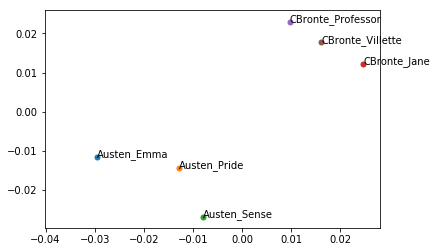

In [41]:
for x, y, name in zip(pos[:, 0], pos[:, 1], names):
  plt.scatter(x, y, s=25)
  plt.text(x, y, name)
  

In [0]:
# 3d visualization

mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)

In [0]:
pos = mds.fit_transform(dist)

In [44]:
pos

array([[-0.0256792 , -0.01803289, -0.00622741],
       [-0.01155265, -0.00916017, -0.01454328],
       [-0.02167813,  0.00703161, -0.01499298],
       [ 0.02623944,  0.00435707,  0.00504144],
       [ 0.01606332,  0.00342159,  0.01832136],
       [ 0.01660721,  0.01238279,  0.01240088]])

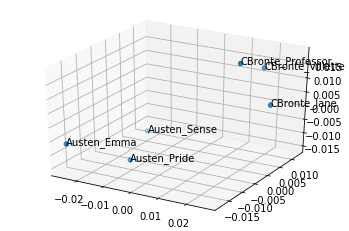

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
  ax.text(x, y, z, s)
  
plt.show()

Clustering 

Based on distance

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram

In [0]:
linkage_matrix = ward(dist)

In [50]:
linkage_matrix

array([[4.        , 5.        , 0.01623084, 2.        ],
       [3.        , 6.        , 0.02554585, 3.        ],
       [1.        , 2.        , 0.02666494, 2.        ],
       [0.        , 8.        , 0.03997317, 3.        ],
       [7.        , 9.        , 0.16535482, 6.        ]])

{'color_list': ['g', 'g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.0162308375308938, 0.0162308375308938, 0.0],
  [0.0, 0.02554584889944319, 0.02554584889944319, 0.0162308375308938],
  [0.0, 0.026664938673982768, 0.026664938673982768, 0.0],
  [0.0, 0.03997317315741364, 0.03997317315741364, 0.026664938673982768],
  [0.02554584889944319,
   0.16535482370281632,
   0.16535482370281632,
   0.03997317315741364]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'ivl': ['CBronte_Jane',
  'CBronte_Professor',
  'CBronte_Villette',
  'Austen_Emma',
  'Austen_Pride',
  'Austen_Sense'],
 'leaves': [3, 4, 5, 0, 1, 2]}

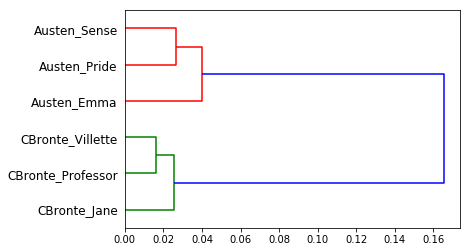

In [51]:
dendrogram(linkage_matrix, orientation='right', labels=names)